In [5]:
# Duplicate this template, write your scryfall query here and then run the notebook
QUERY = "t:creature sort:edhrec"
LIMIT = 100

In [6]:
import mtgstats.scryfall.api as api
import mtgstats.cards as c
from mtgstats.analysis import cmc_analysis, color_analysis, subtype_analysis
from mtgstats.plots import cmc_distribution, color_distribution
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
query = api.search(QUERY, limit=LIMIT)
cards = c.parse_cards(query)
data = pd.DataFrame(cards)

In [8]:
data.head()

,name,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,rarity,edhrec_rank
0,Solemn Simulacrum,{4},4.0,Artifact Creature — Golem,"When Solemn Simulacrum enters the battlefield,...",2,2,[],[],[],rare,20
1,Sakura-Tribe Elder,{1}{G},2.0,Creature — Snake Shaman,Sacrifice Sakura-Tribe Elder: Search your libr...,1,1,[G],[G],[],common,36
2,Eternal Witness,{1}{G}{G},3.0,Creature — Human Shaman,"When Eternal Witness enters the battlefield, y...",2,1,[G],[G],[],uncommon,37
3,Llanowar Elves,{G},1.0,Creature — Elf Druid,{T}: Add {G}.,1,1,[G],[G],[],common,48
4,Birds of Paradise,{G},1.0,Creature — Bird,Flying\n{T}: Add one mana of any color.,0,1,[G],[G],[Flying],rare,58


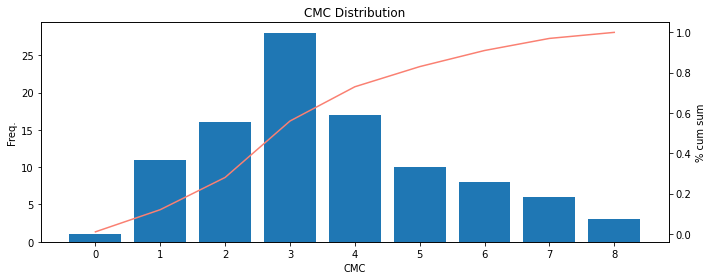

In [9]:
cmc_distribution(cards)

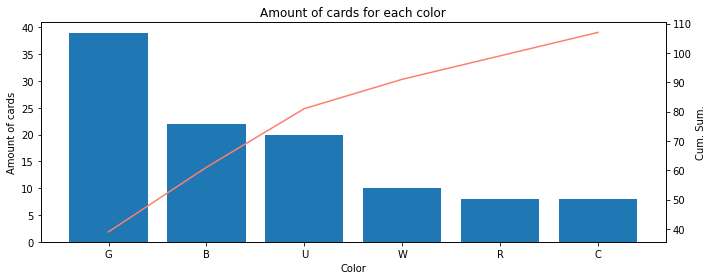

In [10]:
color_distribution(cards)

In [11]:
data[data.type_line.str.contains("Artifact")]

,name,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,rarity,edhrec_rank
0,Solemn Simulacrum,{4},4.0,Artifact Creature — Golem,"When Solemn Simulacrum enters the battlefield,...",2,2,[],[],[],rare,20
7,Burnished Hart,{3},3.0,Artifact Creature — Elk,"{3}, Sacrifice Burnished Hart: Search your lib...",2,2,[],[],[],uncommon,78
50,Walking Ballista,{X}{X},0.0,Artifact Creature — Construct,Walking Ballista enters the battlefield with X...,0,0,[],[],[],rare,378
54,Steel Hellkite,{6},6.0,Artifact Creature — Dragon,Flying\n{2}: Steel Hellkite gets +1/+0 until e...,5,5,[],[],[Flying],rare,394
58,Baleful Strix,{U}{B},2.0,Artifact Creature — Bird,"Flying, deathtouch\nWhen Baleful Strix enters ...",1,1,"[B, U]","[B, U]","[Deathtouch, Flying]",rare,403
63,Meteor Golem,{7},7.0,Artifact Creature — Golem,"When Meteor Golem enters the battlefield, dest...",3,3,[],[],[],uncommon,415
64,Phyrexian Metamorph,{3}{U/P},4.0,Artifact Creature — Shapeshifter,({U/P} can be paid with either {U} or 2 life.)...,0,0,[U],[U],[],rare,418
66,Psychosis Crawler,{5},5.0,Artifact Creature — Horror,Psychosis Crawler's power and toughness are ea...,*,*,[],[],[],rare,427
70,Foundry Inspector,{3},3.0,Artifact Creature — Construct,Artifact spells you cast cost {1} less to cast.,3,2,[],[],[],common,436
84,Etherium Sculptor,{1}{U},2.0,Artifact Creature — Vedalken Artificer,Artifact spells you cast cost {1} less to cast.,1,2,[U],[U],[],common,489


In [12]:
type_series["Zombie"]

4

In [15]:
type_analysis = subtype_analysis(cards)
type_series = pd.Series(type_analysis)
type_series.sort_values()

Illusion         1
Dryad            1
Soldier          1
Elder            1
God              1
Centaur          1
Treefolk         1
Nymph            1
Sphinx           1
Incarnation      1
Angel            1
Drake            1
Elephant         1
Vedalken         1
Artificer        1
Cat              1
Myr              1
Demon            1
Giant            1
Elk              1
Ally             1
Shapeshifter     2
Goblin           2
Horror           2
Dinosaur         2
Scout            2
Monk             2
Ooze             2
Golem            2
Praetor          2
Knight           2
Naga             2
Aetherborn       2
Warrior          2
Dragon           2
Bird             3
Snake            3
Construct        3
Spirit           3
Rogue            3
Cleric           3
Beast            3
Pirate           3
Vampire          4
Elemental        4
Merfolk          4
Zombie           4
Shaman           7
Wizard          13
Druid           15
Elf             17
Human           21
dtype: int64

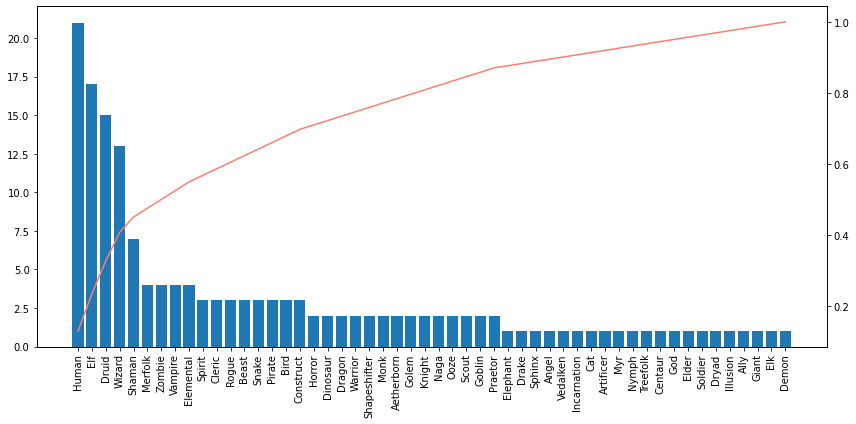

In [46]:
fig, ax = plt.subplots(figsize = (12, 6))

sorted_series = type_series.sort_values(ascending=False)


ax.bar(range(sorted_series.size), sorted_series)
ax.set(
    xticks = range(sorted_series.size),
    xticklabels= sorted_series.index
)
ax.tick_params(axis='x', rotation=90)

cumsum_ax = ax.twinx()
cumsum_ax.plot(sorted_series.cumsum()/sorted_series.sum(), c='salmon')

fig.tight_layout()